<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_11_Pandas Explode.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## 🟨 Bar Plot of Top Skills for Cloud Engineers (2.11.1)

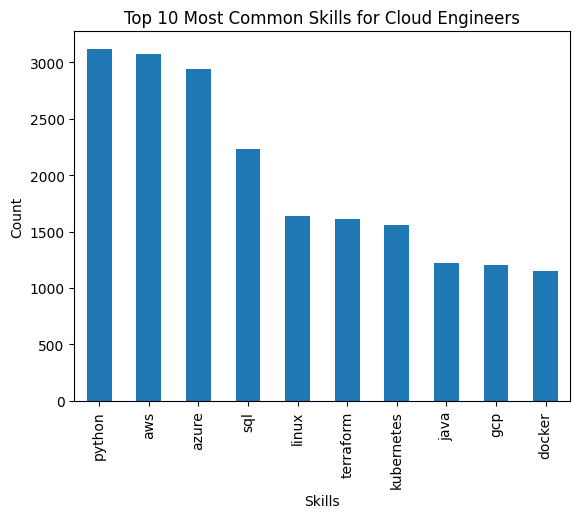

In [51]:
cloud_enginners_df = df[df['job_title_short'] == 'Cloud Engineer']

cloud_enginners_df = cloud_enginners_df.explode('job_skills')

cloud_enginners_df.value_counts('job_skills', ascending=False).head(10).plot(kind='bar')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.title('Top 10 Most Common Skills for Cloud Engineers')
plt.show()


---

## 🟨 Average Salary by Skill (2.11.2)

In [52]:
exploded_df = df.explode('job_skills')

avg_salary = exploded_df.groupby('job_skills')['salary_year_avg'].mean().reset_index()
avg_salary.sort_values(by='salary_year_avg', ascending=False).head()

,job_skills,salary_year_avg
46,debian,196500.000000
177,ringcentral,182500.000000
114,lua,170500.000000
126,mongo,169526.929749
54,dplyr,160667.210526


---

## 🟥 Unique Skills Count (2.11.3)

In [57]:
exploded_df = df.explode('job_skills')

unique_skills_count = exploded_df.groupby('job_title_short')['job_skills'].nunique().reset_index()
# unique_skills_count.columns = ['job_title_short', 'num_unique_skills']
unique_skills_count = unique_skills_count.rename(columns={'job_skills': 'num_unique_skills'})
unique_skills_count.head()

,job_title_short,num_unique_skills
0,Business Analyst,223
1,Cloud Engineer,213
2,Data Analyst,235
3,Data Engineer,239
4,Data Scientist,237


---